In [3]:
import os
import numpy as np
files = os.listdir('./averaged_results')
prefix = 'ff'
# print(files)
plot_files = []
for file in files:
    if file.startswith(prefix):
        plot_files.append(file)

print(plot_files)
#plot_files = ['FastFailCifar0_0random.log']

['ff0_9random.log', 'ff0_0random.log', 'ff0_5random.log', 'ff0_95random.log', 'ff1_0random.log', 'ff0_75random.log']


In [4]:
parent_dir = './averaged_results'
hinted_results = {}
pure_results = {}
div = 8

for file in plot_files:
    path = os.path.join(parent_dir, file)
    fo = open(path, "r+")
    lines = fo.readlines()
    #lines = [line.strip() for line in lines]
    accs = lines[0].split(' ')
    print(file)
    hinted_results[file] = []
    pure_results[file] = []
    shape = len(accs) // div
    #print(accs)
    for i in range(shape):
        #  f.write(tr_s['acc'] + ' ' + val_hint['acc'] + ' ' + val_pure['acc'] + ' ' + ... )
        hinted_results[file].append(float(accs[i * div + 1]))
        pure_results[file].append(float(accs[i * div + 2]))
    fo.close()

ff0_9random.log
ff0_0random.log
ff0_5random.log
ff0_95random.log
ff1_0random.log
ff0_75random.log


In [29]:
from numpy import *
import math
import matplotlib.pyplot as plt

# FastFailCifar0_95random.log FastFailCifar0_5random.log FastFailCifar0_0random.log
# FastFailCifar1_0random.log FastFailCifar0_9random.log FastFailCifar0_75random.log

def plot_all_accuracies(results, test_name):
    import seaborn as sns
    sns.set_style('whitegrid')
    a = results['ff0_0random.log'][:400]
    b = results['ff0_5random.log'][:400]#[:200]
    #b = results['FastFailCifar0_25random.log']#[20:]
    c = results['ff0_75random.log'][:400]#[20:]
    d = results['ff0_9random.log'][:400]#][20:]
    e = results['ff0_95random.log'][:400]#[:200]
    f = results['ff1_0random.log'][:400]
    x = np.arange(len(a))

    plt.title(test_name, color='black')
    plt.plot(x, a, 'orange', label='0.0')
    plt.plot(x, c, 'black', label='0.5')
    plt.plot(x, d, 'red', label='0.75')
    plt.plot(x, f, 'purple', label='0.9')
    plt.plot(x, b, 'blue', label='0.95')
    plt.plot(x, e, 'green', label='1.0')
    plt.ylim(0, 105)

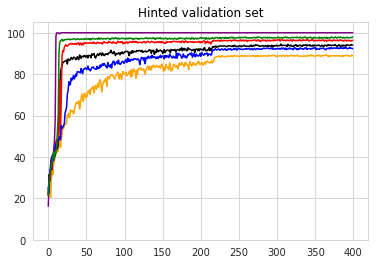

In [30]:
plot_all_accuracies(hinted_results, 'Hinted validation set')

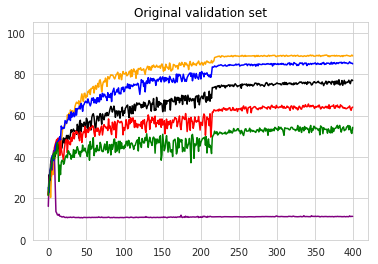

In [31]:
plot_all_accuracies(pure_results, 'Original validation set')

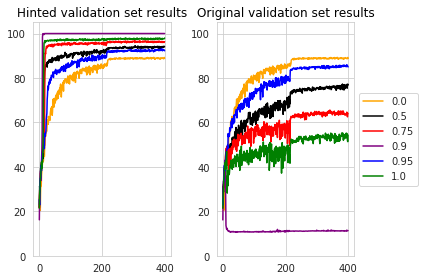

In [35]:

plt.figure(figsize=(6,4))
plt.subplot(121, title="xd")
plot_all_accuracies(hinted_results, 'Hinted validation set results')
# plt.plot(t1, f(t1), color='tab:blue', marker='o')
# plt.plot(t2, f(t2), color='black')

plt.subplot(122, title="xdd")
plot_all_accuracies(pure_results, 'Original validation set results')
# plt.plot(t2, np.cos(2*np.pi*t2), color='tab:orange', linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

#plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.savefig('different_hp3.png')